In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("/content/asthma_disease_data.csv")

In [3]:
df = df.drop(columns=['PatientID','Gender','EducationLevel', 'Ethnicity', 'DoctorInCharge'])

In [4]:
df.isnull().sum()

,0
Age,0
BMI,0
Smoking,0
PhysicalActivity,0
DietQuality,0
SleepQuality,0
PollutionExposure,0
PollenExposure,0
DustExposure,0
PetAllergy,0


In [5]:
(df['Diagnosis'] == 1).sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   BMI                     2392 non-null   float64
 2   Smoking                 2392 non-null   int64  
 3   PhysicalActivity        2392 non-null   float64
 4   DietQuality             2392 non-null   float64
 5   SleepQuality            2392 non-null   float64
 6   PollutionExposure       2392 non-null   float64
 7   PollenExposure          2392 non-null   float64
 8   DustExposure            2392 non-null   float64
 9   PetAllergy              2392 non-null   int64  
 10  FamilyHistoryAsthma     2392 non-null   int64  
 11  HistoryOfAllergies      2392 non-null   int64  
 12  Eczema                  2392 non-null   int64  
 13  HayFever                2392 non-null   int64  
 14  GastroesophagealReflux  2392 non-null   

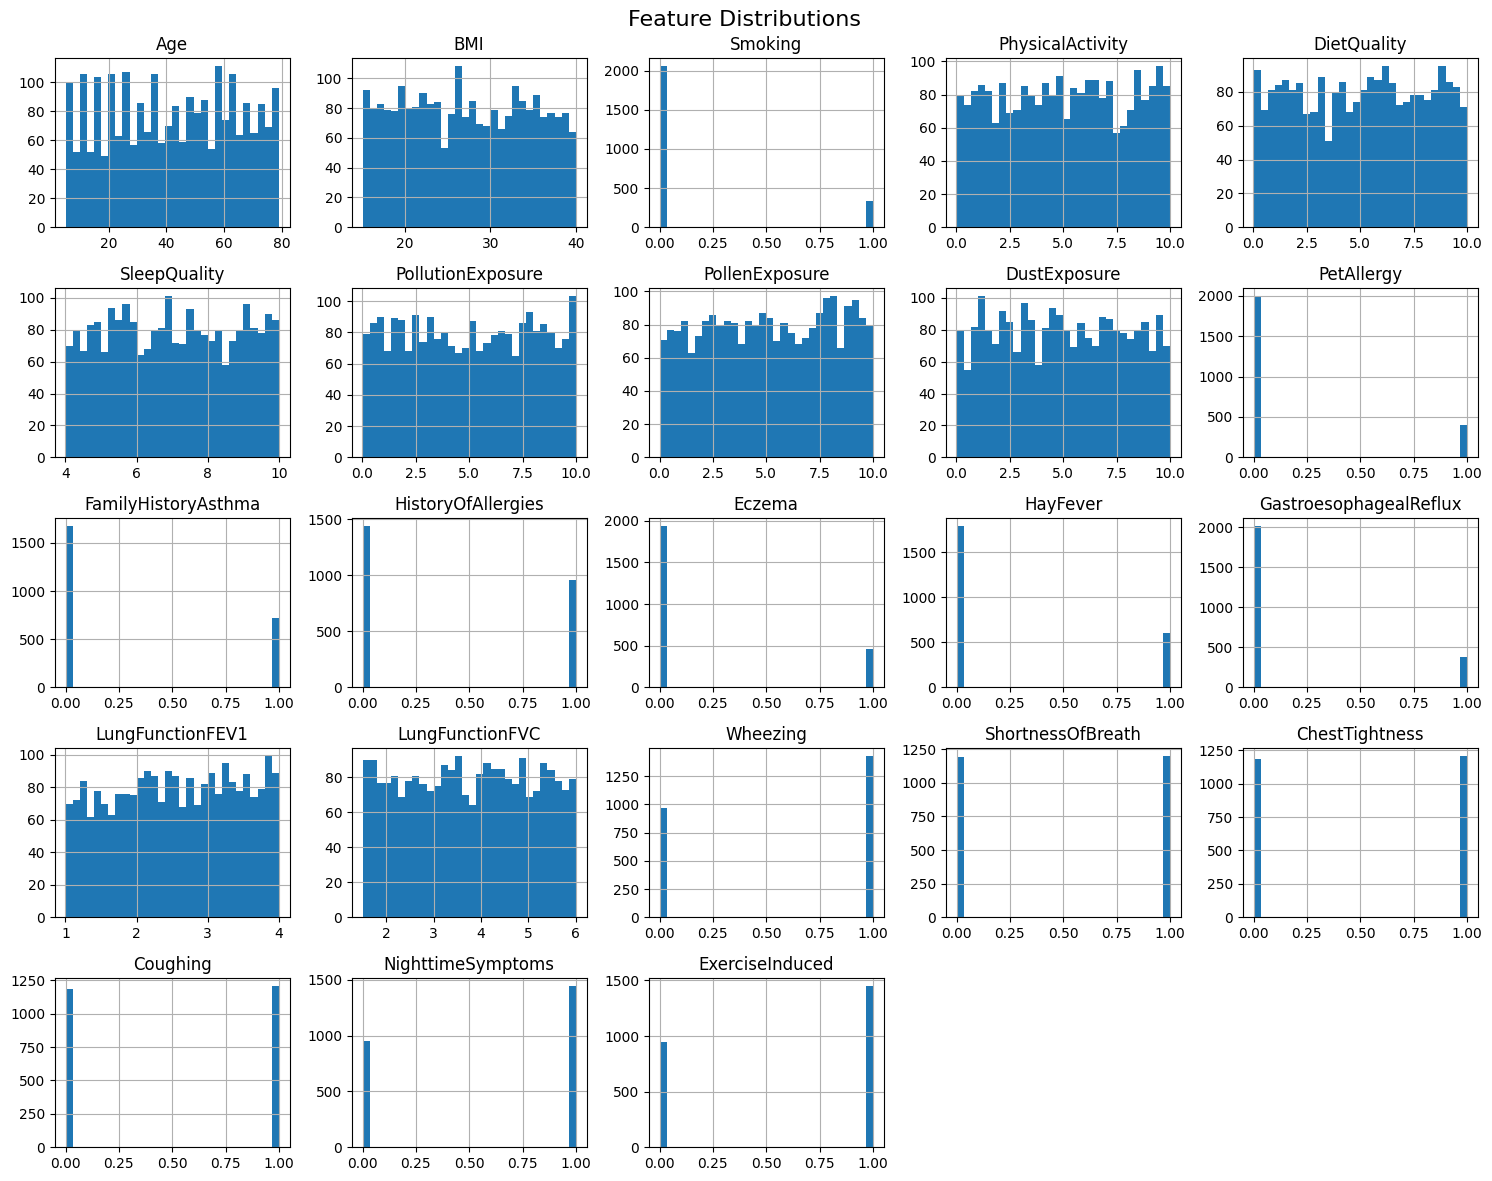

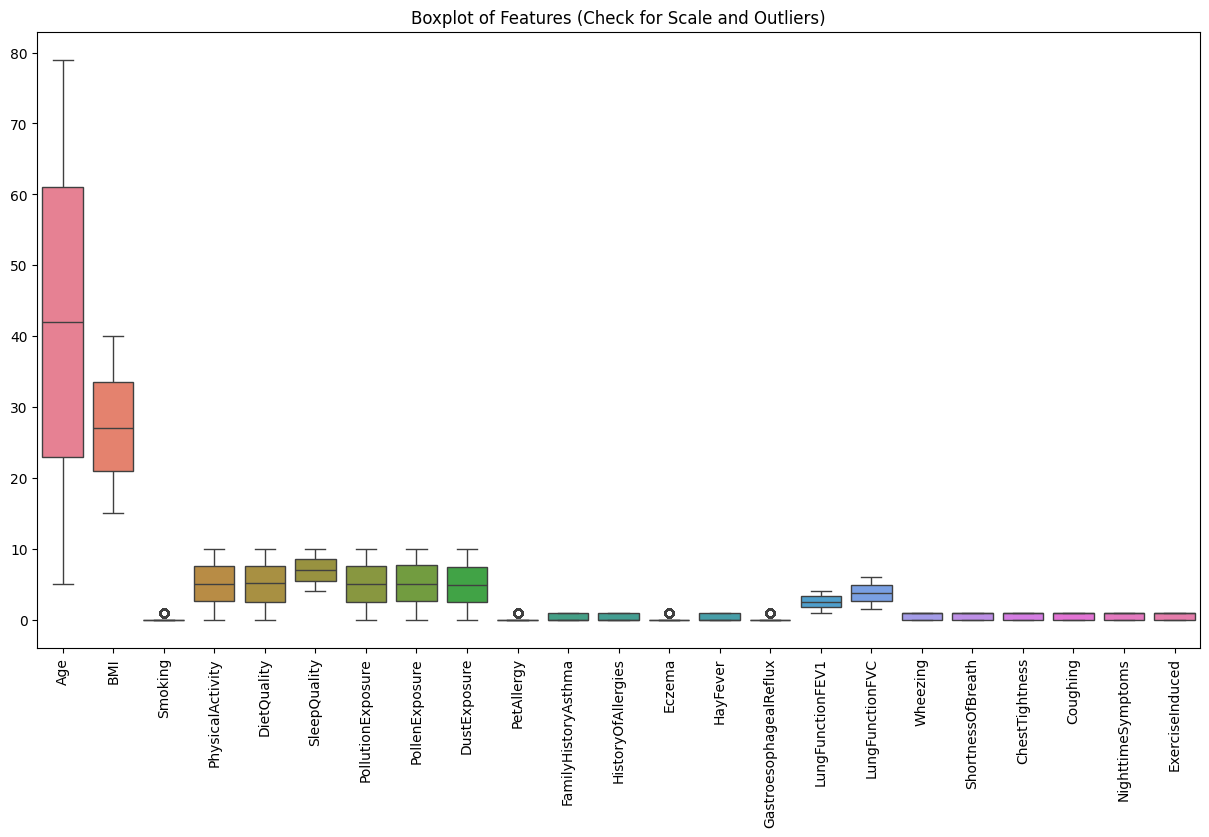

In [6]:
features = df.drop("Diagnosis", axis=1)

# Plot histograms
features.hist(bins=30, figsize=(15, 12))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# Plot boxplots to check for outliers and scale range
plt.figure(figsize=(15, 8))
sns.boxplot(data=features)
plt.xticks(rotation=90)
plt.title("Boxplot of Features (Check for Scale and Outliers)")
plt.show()


In [7]:
sc2 = StandardScaler()
cols_to_scale = ['BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality','Age','PollutionExposure', 'PollenExposure',
  'DustExposure', 'LungFunctionFEV1', 'LungFunctionFVC']
df[cols_to_scale] = sc2.fit_transform(df[cols_to_scale])

In [8]:
df.to_csv('pp_asthma_data.csv', index=False)
from google.colab import files
files.download('pp_asthma_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"].astype(int)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [12]:
rf = RandomForestClassifier(n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
     class_weight='balanced',
    random_state=42,
    n_jobs=-1)
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [13]:
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8643006263048016
Confusion Matrix:
 [[412  42]
 [ 23   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       454
           1       0.05      0.08      0.06        25

    accuracy                           0.86       479
   macro avg       0.50      0.49      0.49       479
weighted avg       0.90      0.86      0.88       479

